# Clustering for Crime Data

In [1]:
#Perform Clustering(Hierarchical, Kmeans & DBSCAN)
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder


# EDA

In [2]:
#for the crime data and identify the number of clusters formed and draw inferences

crime_df=pd.read_csv('crime_data.csv')
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#size of the overall dataset
crime_df.shape

(50, 5)

In [5]:
crime_df['Unnamed: 0']

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [7]:
crime_df['Murder'].unique()

array([13.2, 10. ,  8.1,  8.8,  9. ,  7.9,  3.3,  5.9, 15.4, 17.4,  5.3,
        2.6, 10.4,  7.2,  2.2,  6. ,  9.7,  2.1, 11.3,  4.4, 12.1,  2.7,
       16.1,  4.3, 12.2,  7.4, 11.4, 11.1, 13. ,  0.8,  7.3,  6.6,  4.9,
        6.3,  3.4, 14.4,  3.8, 12.7,  3.2,  8.5,  4. ,  5.7,  6.8])

In [8]:
crime_df['Assault'].unique()

array([236, 263, 294, 190, 276, 204, 110, 238, 335, 211,  46, 120, 249,
       113,  56, 115, 109,  83, 300, 149, 255,  72, 259, 178, 102, 252,
        57, 159, 285, 254, 337,  45, 151, 106, 174, 279,  86, 188, 201,
        48, 156, 145,  81,  53, 161], dtype=int64)

In [9]:
crime_df['UrbanPop'].unique()

array([58, 48, 80, 50, 91, 78, 77, 72, 60, 83, 54, 65, 57, 66, 52, 51, 67,
       85, 74, 44, 70, 53, 62, 81, 56, 89, 86, 45, 75, 68, 87, 59, 32, 63,
       73, 39], dtype=int64)

In [10]:
crime_df['Rape'].unique()

array([21.2, 44.5, 31. , 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2,
       14.2, 24. , 21. , 11.3, 18. , 16.3, 22.2,  7.8, 27.8, 35.1, 14.9,
       17.1, 28.2, 16.4, 16.5, 46. ,  9.5, 18.8, 32.1, 26.1, 16.1,  7.3,
       21.4, 20. , 29.3,  8.3, 22.5, 12.8, 26.9, 25.5, 22.9, 11.2, 20.7,
       26.2,  9.3, 10.8, 15.6])

In [11]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

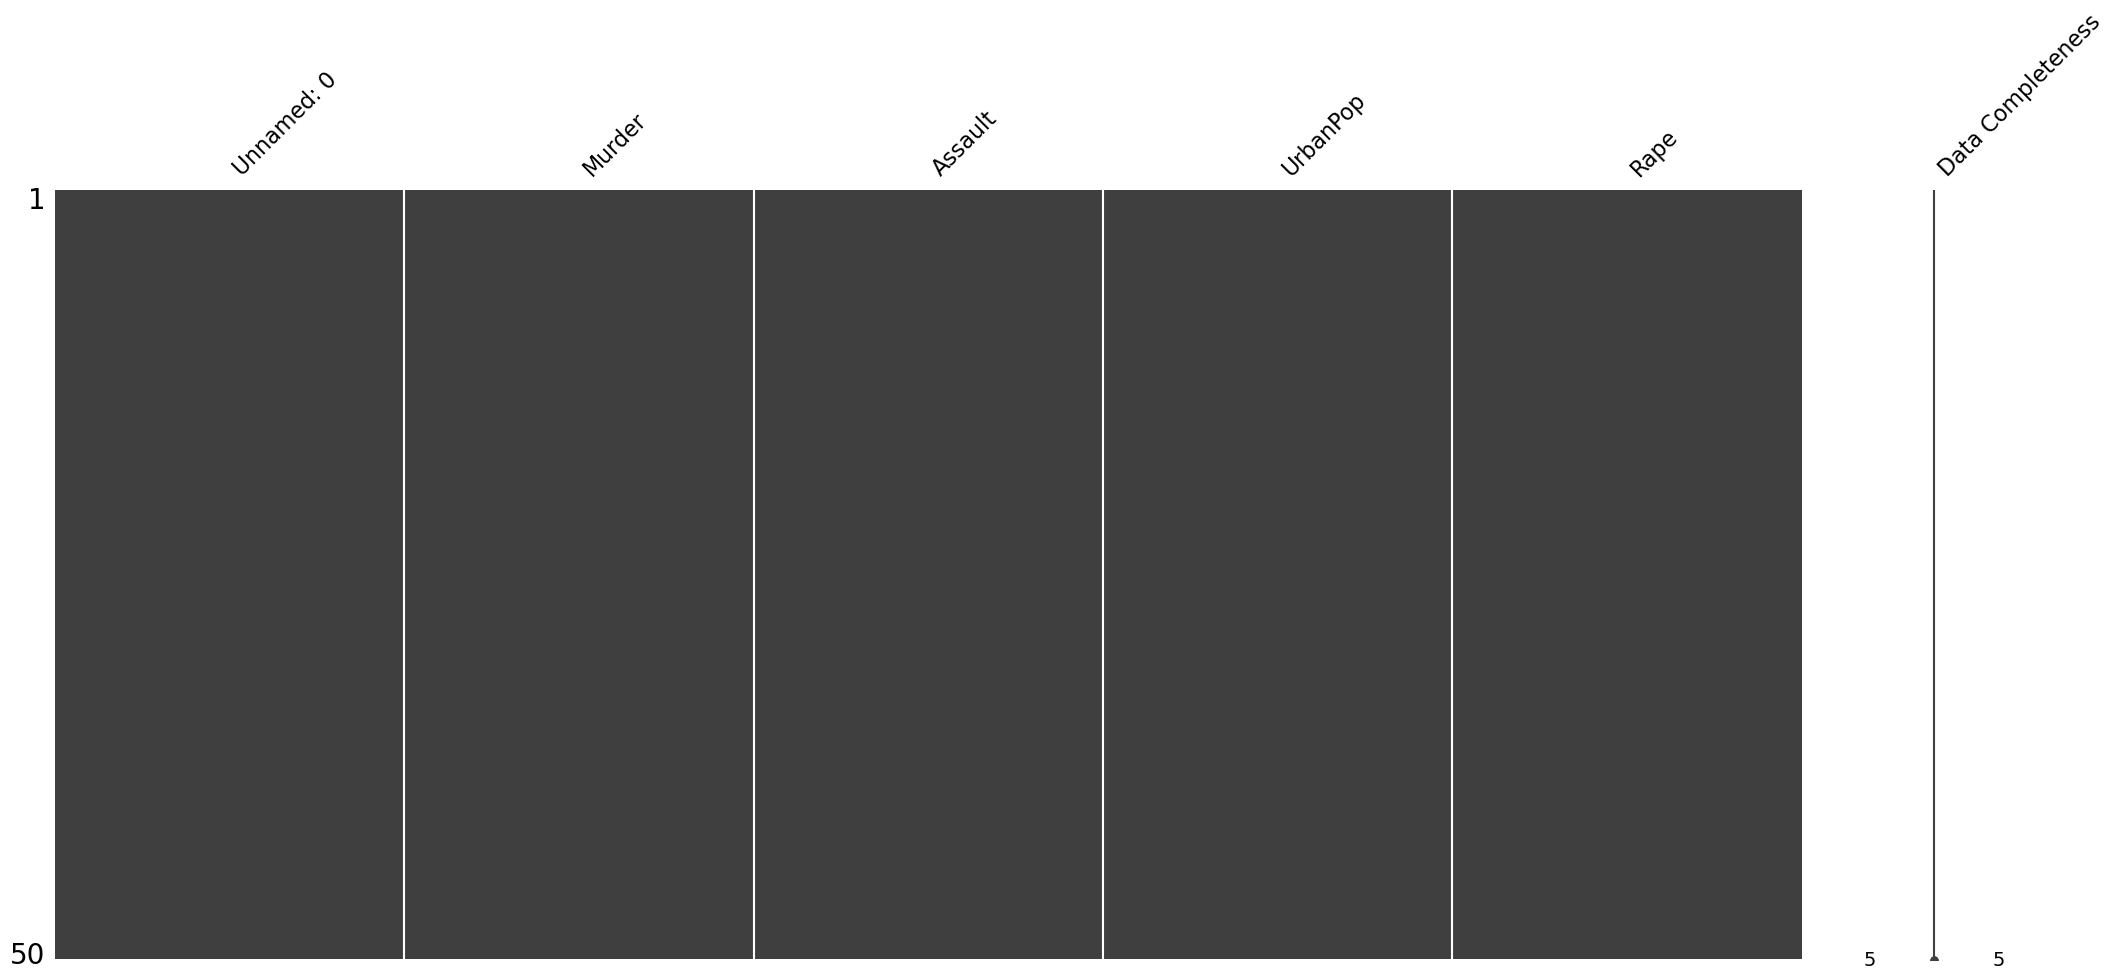

In [14]:
#finding null values
import missingno as msno

msno.matrix(crime_df, labels=True, sort="descending");
crime_df.isnull().sum()

In [15]:
crime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


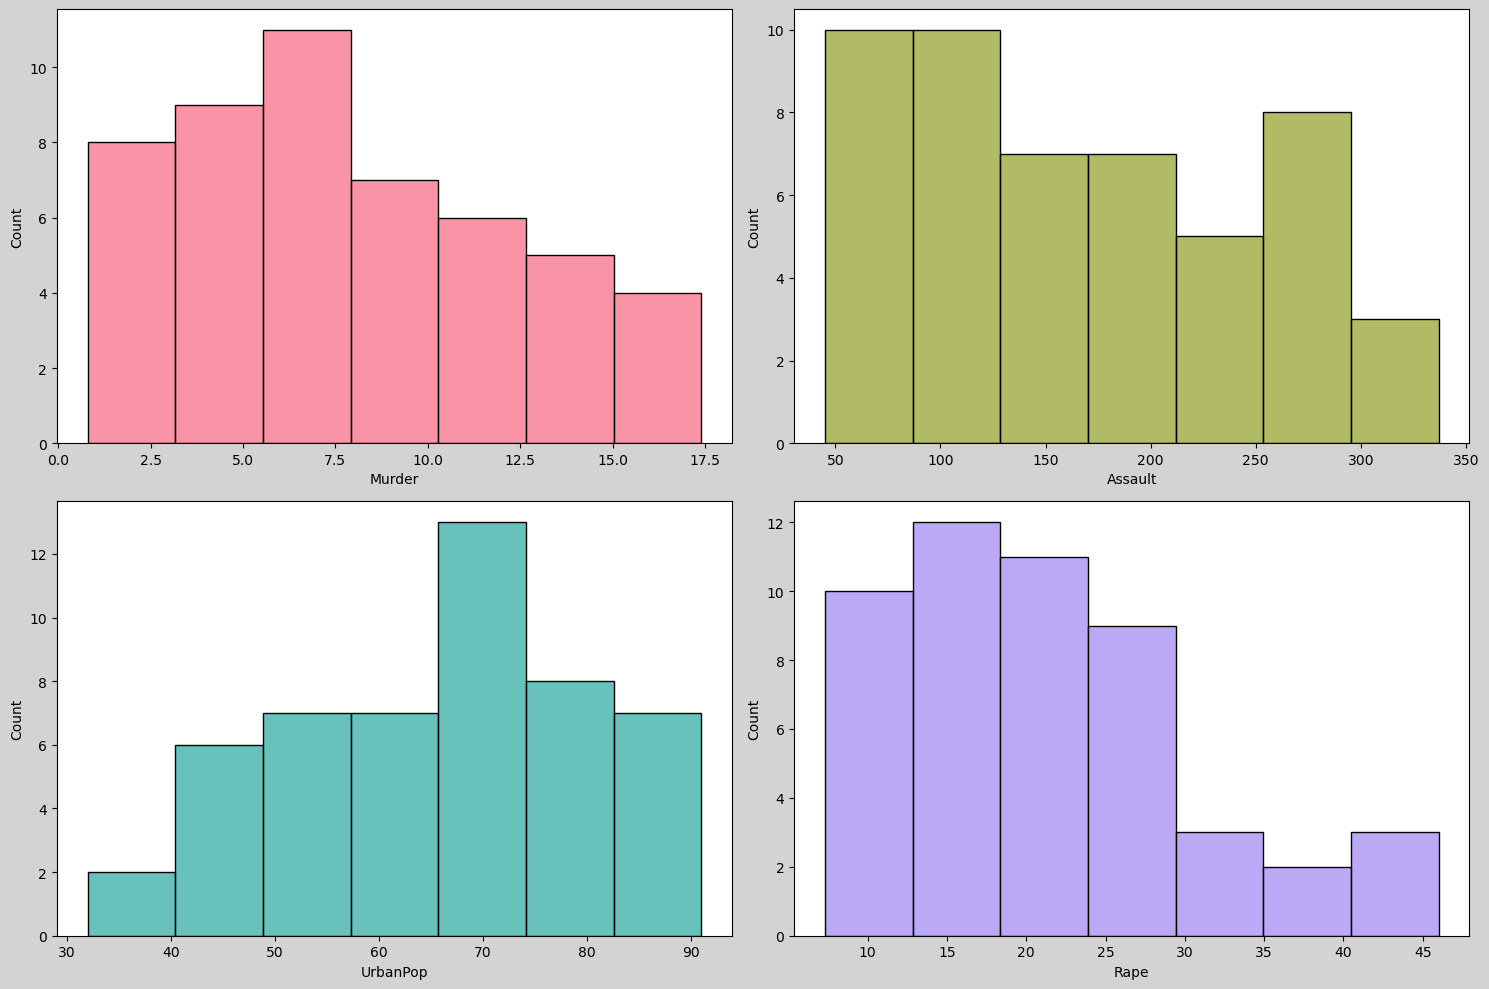

In [21]:
import matplotlib.pyplot as plt

c=2
r=2
col=crime_df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,10),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=crime_df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

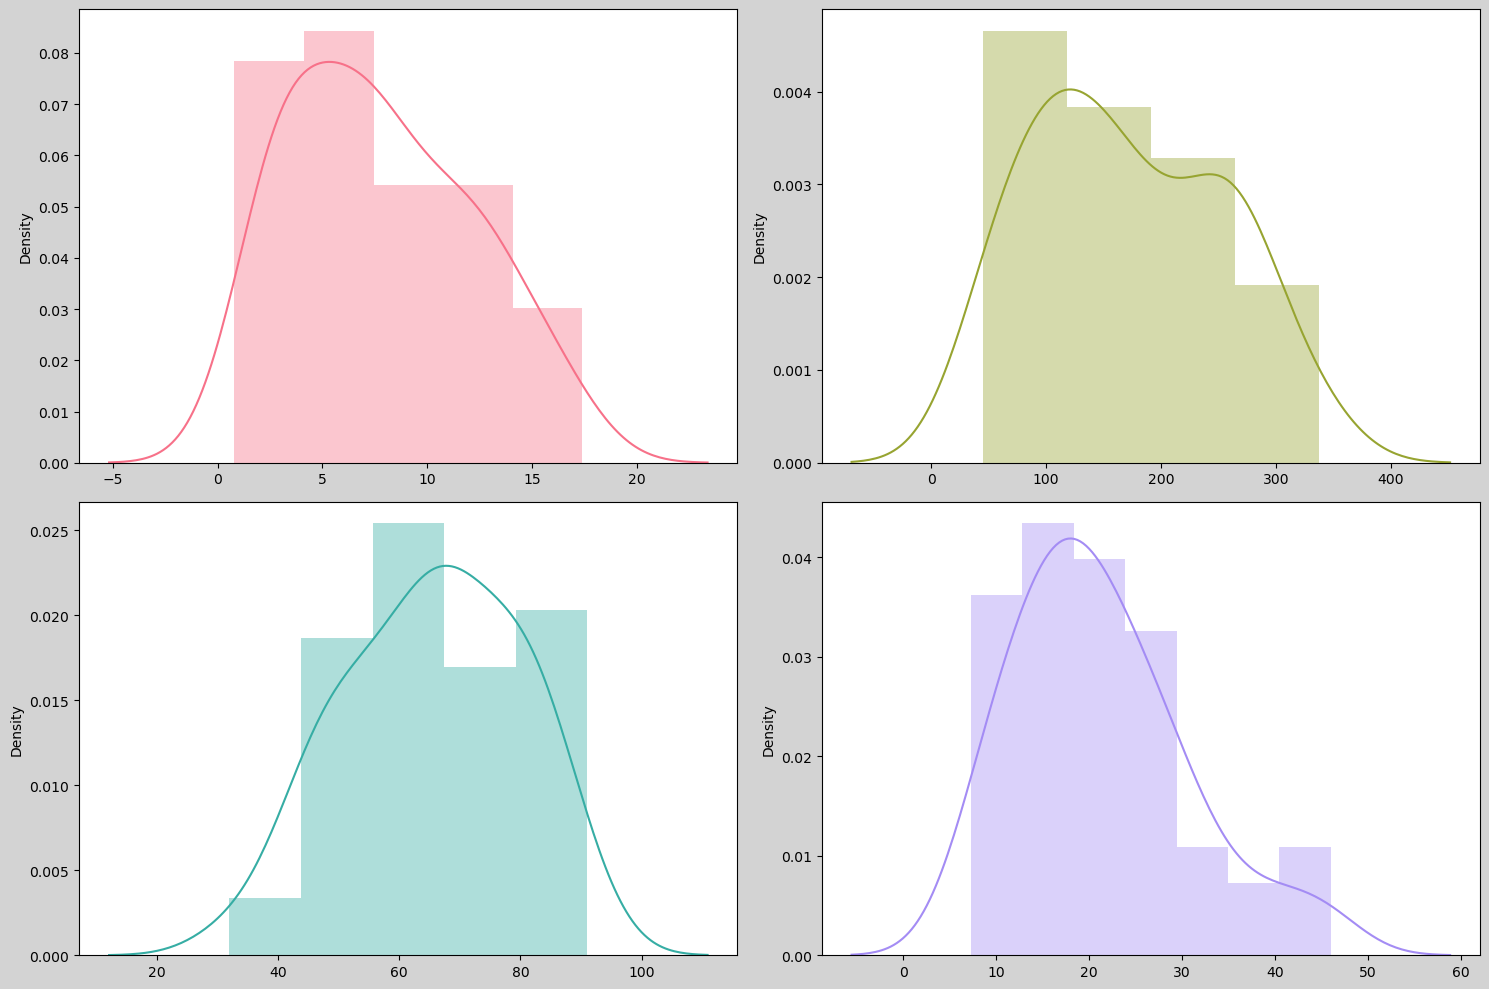

In [23]:
import warnings

warnings.filterwarnings('ignore')

c=2
r=2
col=crime_df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,10),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=crime_df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

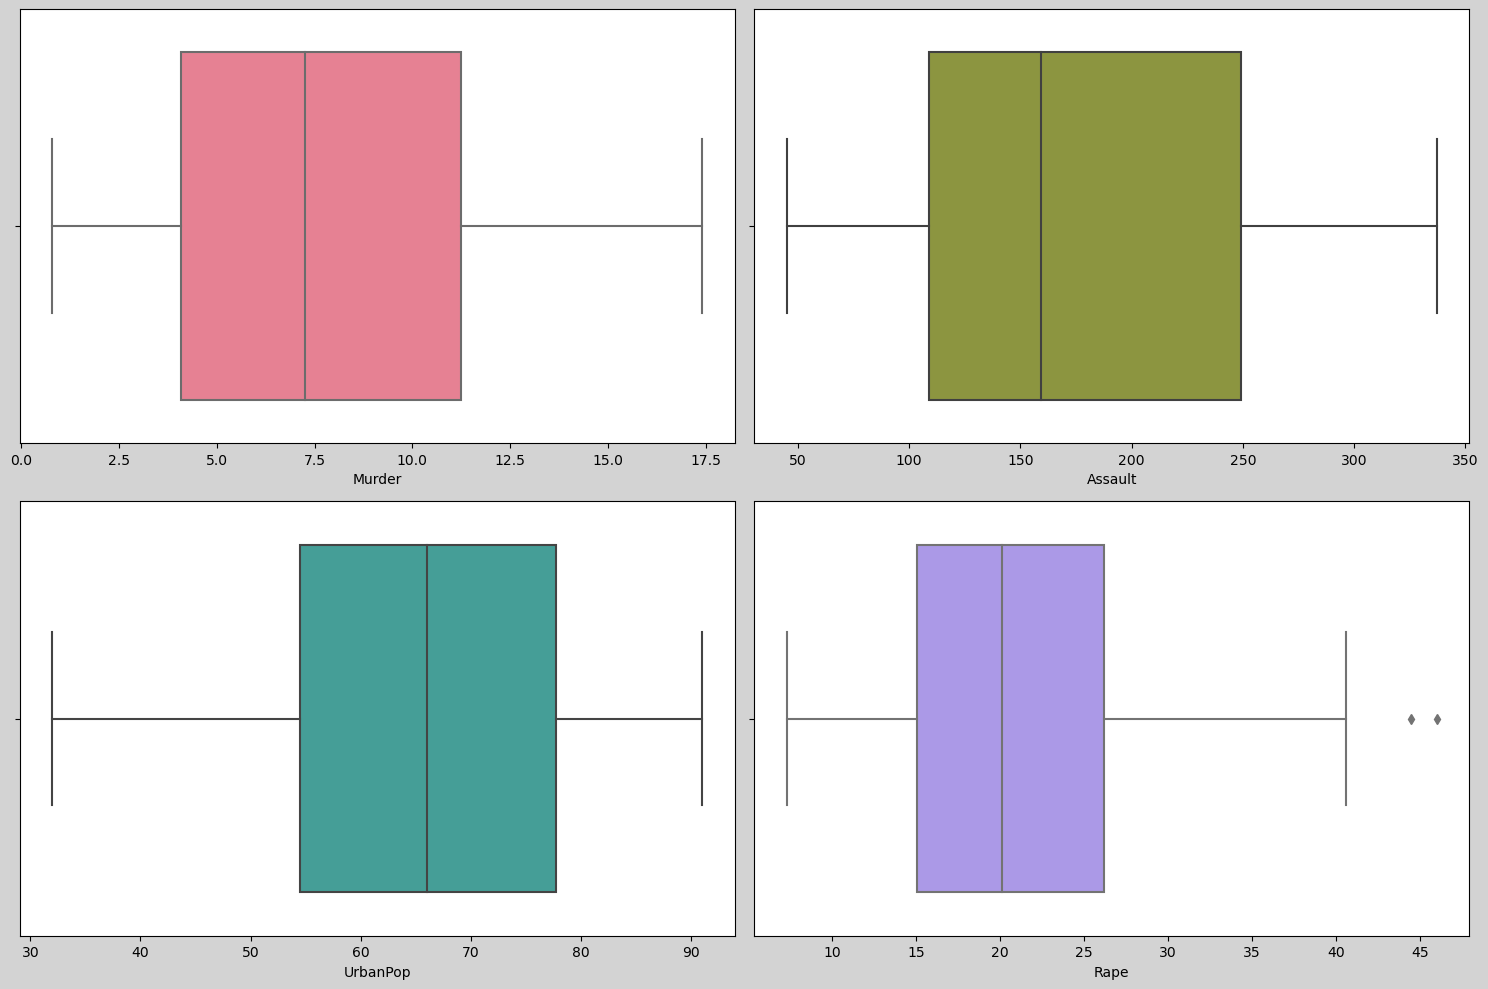

In [24]:
import matplotlib.pyplot as plt

c=2
r=2
col=crime_df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,10),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=crime_df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

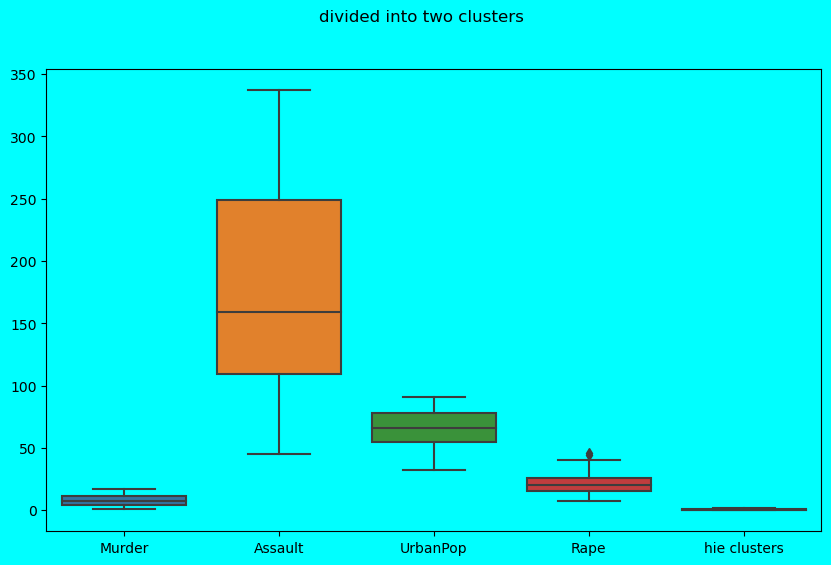

In [90]:
plt.figure(figsize=(10,6),facecolor='cyan')
ax=plt.axes()
ax.set_facecolor('cyan')
plt.suptitle('divided into two clusters')
x=crime_df.iloc[:,1:]
sns.boxplot(data=x);

,Murder,Assault,UrbanPop,Rape,hie clusters
Murder,1.000000,0.801873,0.069573,0.563579,0.687714
Assault,0.801873,1.000000,0.258872,0.665241,0.796457
UrbanPop,0.069573,0.258872,1.000000,0.411341,0.341564
Rape,0.563579,0.665241,0.411341,1.000000,0.724396
hie clusters,0.687714,0.796457,0.341564,0.724396,1.000000


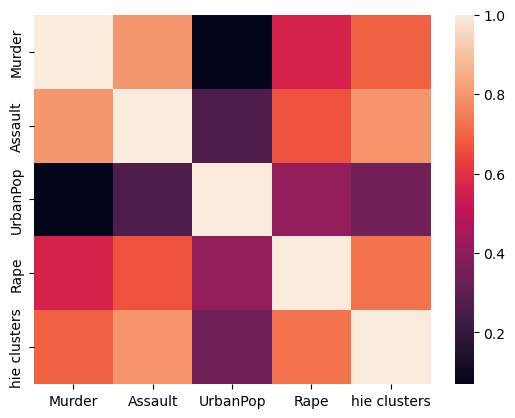

In [94]:
#checking the co relation of all the variables present in datasets
sns.heatmap(crime_df.corr())#visualizing using heatmap feel great 

#checking the values of correlation
crime_df.corr()

#I didn't found the outlier in all those attributes execpt rape as one or two outlier as shown in boxplots

Q1=crime_df['Rape'].quantile(.25)
Q3=crime_df['Rape'].quantile(.75)

iqr=Q3-Q1
upper=Q3+1.5*iqr
lower=Q1-1.5*iqr
crime=np.where(crime_df['Rape']>upper,upper,crime_df['Rape'])#here i am replacing the outlier by capping the same value of upper limit


crime_df['Rape']=pd.Series(np.round(crime,2))

first lets start KMeans

In [27]:
#first lets plot the scatter plot to get some idea on how many clusters can be used
#before doing that lets use pca method to reduce the variables so that we can easily plot the scatter plot


from sklearn.decomposition import PCA

pca=PCA(2).fit_transform(x)


<AxesSubplot:>

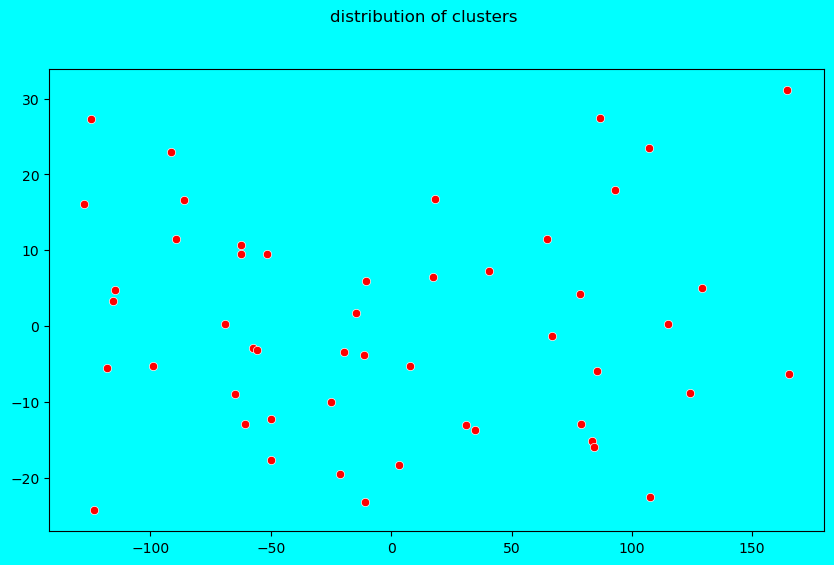

In [89]:
#ok now lets plot it
plt.figure(figsize=(10,6),facecolor='cyan')
ax=plt.axes()
ax.set_facecolor('cyan')
plt.suptitle('distribution of clusters')
sns.scatterplot(pca[:,0],pca[:,1],color='red')

In [29]:
model=KMeans(n_clusters=3,init='k-means++',random_state=0).fit_predict(x)

In [30]:
model

array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1])

Text(0.5, 0.98, 'Elbow graph')

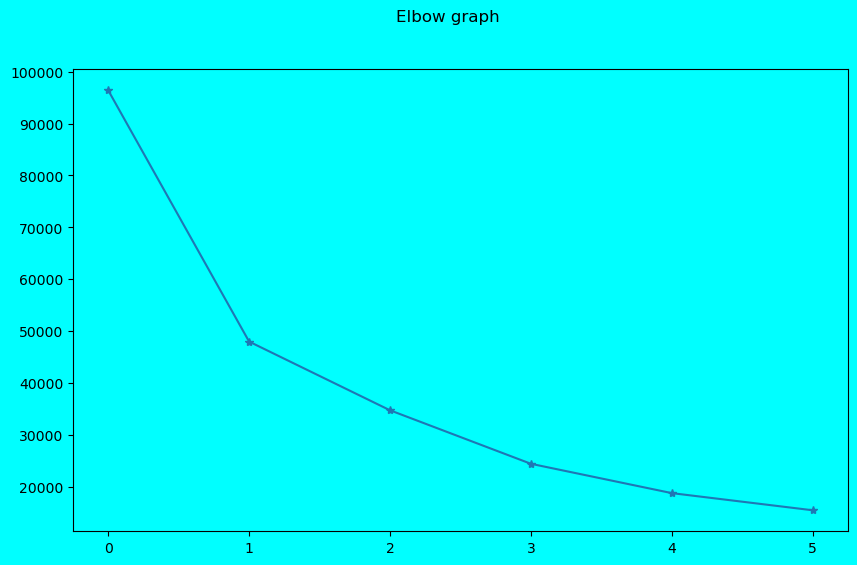

In [92]:
#lets find the ideal cluster because i am not that much satisified with the above ones

wcss=[]#creating the list so i am using some hyperparameter to find which clusters would be best

for i in range(2,8):
    m=KMeans(n_clusters=i,init='k-means++',random_state=0).fit(x)
    wcss.append(m.inertia_)
plt.figure(figsize=(10,6),facecolor='cyan')
ax=plt.axes()
ax.set_facecolor('cyan')    
plt.plot(wcss,marker='*')
plt.suptitle('Elbow graph')

In [63]:
#by watching the data from the above elbow graph i came to know that 2 cluster is sufficient
#ok lets create a new model consists of two clusters


kmean=KMeans(n_clusters=2,init='k-means++',random_state=0)
model=kmean.fit_predict(pca)
model


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [64]:
#finding the accuracy of the model
score=silhouette_score(pca,kmean.labels_,metric='euclidean')
print('accuracy after creating it into two clusters',score)

accuracy after creating it into two clusters 0.6000622295964844


In [65]:
#lets create the cluster column and include this column to dataframe

crime_df['clusters']=model
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie clusters,clusters
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,2,1


In [66]:
a=pca[model==0]
b=pca[model==1]

In [67]:
len(a),len(b)

(29, 21)

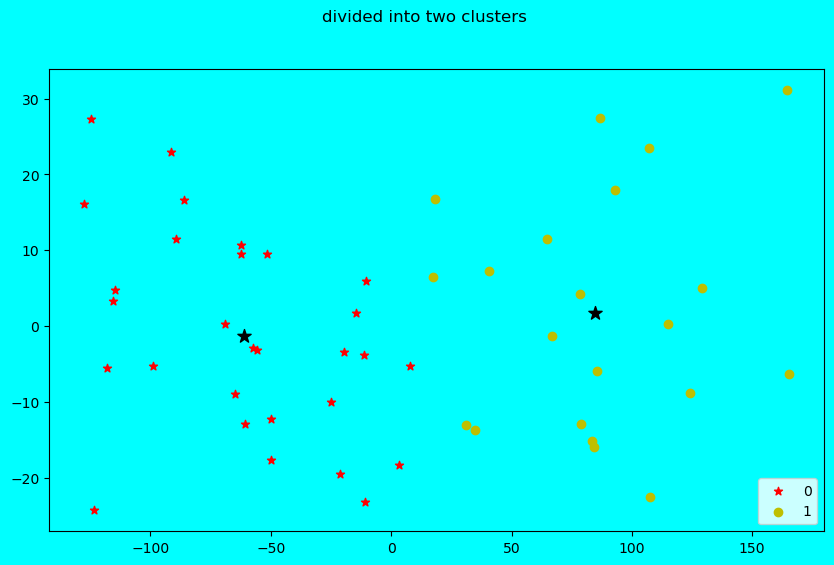

In [71]:
#now lets visualize how clusters are distributed
plt.figure(figsize=(10,6),facecolor='cyan')
ax=plt.axes()
ax.set_facecolor('cyan')
plt.suptitle('divided into two clusters')
plt.scatter(a[:,0],a[:,1],c='r',label=0,marker='*')
plt.scatter(b[:,0],b[:,1],c='y',label=1,marker='o')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=100,marker='*');
plt.legend();


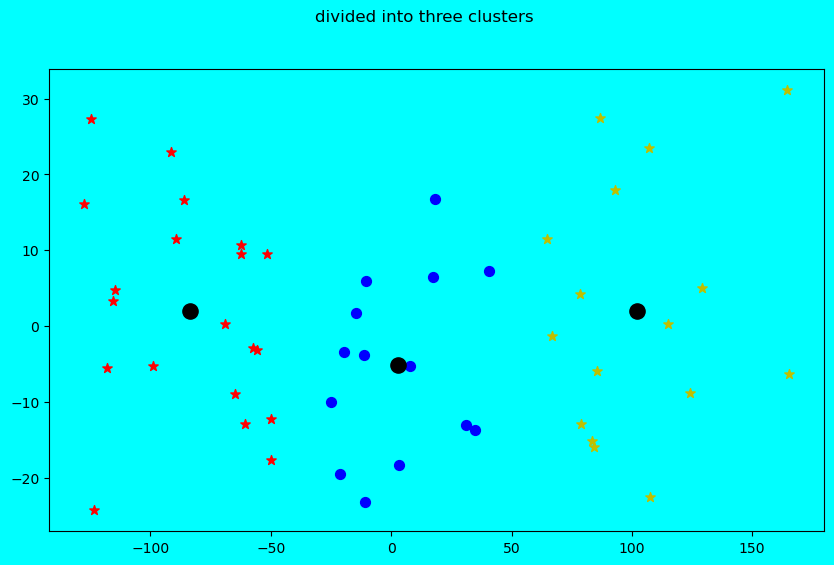

In [72]:
#now lets check if 3 clusters were segrigated
kmean=KMeans(n_clusters=3,init='k-means++',random_state=0)
model=kmean.fit_predict(pca)

a=pca[model==0]
b=pca[model==1]
c=pca[model==2]

plt.figure(figsize=(10,6),facecolor='cyan')
ax=plt.axes()
ax.set_facecolor('cyan')
plt.suptitle('divided into three clusters')
plt.scatter(a[:,0],a[:,1],s=50,marker='*',c='r')
plt.scatter(b[:,0],b[:,1],s=50,marker='o',c='b')
plt.scatter(c[:,0],c[:,1],s=50,marker='*',c='y')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=120)

In [73]:
score=silhouette_score(pca,kmean.labels_,metric='euclidean')
print('accuracy after creating it into two clusters',score)

accuracy after creating it into two clusters 0.5478337354399025


In [74]:
#for two clusters silhoutte-score is comparitvely more then having three clusters 
#so consider only two cluster is best choise

In [75]:
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie clusters,clusters
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,2,1


In [76]:
crime_df.groupby(crime_df['clusters']).agg('mean')

,Murder,Assault,UrbanPop,Rape,hie clusters
clusters,,,,,
0,4.841379,109.758621,64.034483,16.248276,0.000000
1,11.857143,255.000000,67.619048,28.114286,1.428571


In [77]:
crime_df.groupby(crime_df['clusters']).agg('max')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie clusters
clusters,,,,,,
0,Wyoming,9.7,178,89,29.3,0
1,Texas,17.4,337,91,46.0,2


united states of america has 50 states,out of 50 states 29 states has relatively less crime rates,states like connecticut has very less crime rates
where remaining 21 states has comparitvely high crime rates, states like texas has very high crime rates(murder,assault,rapes) in usa

In [78]:
#different types of clustering types like DBscan

In [79]:
x=StandardScaler().fit_transform(x)
model=DBSCAN(eps=2,metric='euclidean').fit_predict(x) 

model

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

IN case of clusters to find the outliers mainly we use DBSCAN to find the outliers which are not in range

lets solve this problem using Hierarchical

In [80]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
crime_df=pd.read_csv('crime_data.csv')
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


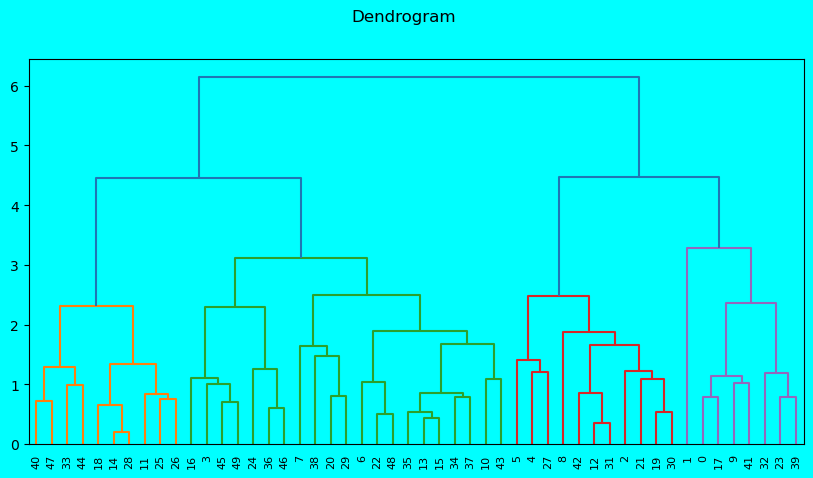

In [81]:
plt.figure(figsize=(10,5),facecolor='cyan')
ax=plt.axes()
ax.set_facecolor('cyan')
plt.suptitle('Dendrogram')
dendogram=hierarchy.dendrogram(hierarchy.linkage(x,method='complete',metric='euclidean'))

In [82]:
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete').fit_predict(x)
hc

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [83]:
crime_df['hie clusters']=hc

In [84]:
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [85]:
crime_df.sort_values('hie clusters').head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hie clusters
24,Missouri,9.0,178,70,28.2,0
48,Wisconsin,2.6,53,66,10.8,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0


In [86]:
print('accuracy of Hierarchi',silhouette_score(pca,hc))

accuracy of Hierarchi 0.36477150741879816


In [87]:
#accuracy was very less in case of having 3 clusters
hc=AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete').fit_predict(x)
print('accuracy of Hierarchi',silhouette_score(pca,hc))

accuracy of Hierarchi 0.5579239247092034
